In [1]:
!git clone https://github.com/i-TripleD/iScore.git

Cloning into 'iScore'...
remote: Enumerating objects: 146, done.
remote: Total 146 (delta 0), reused 0 (delta 0), pack-reused 146 (from 1)
Receiving objects: 100% (146/146), 280.93 MiB | 10.39 MiB/s, done.
Resolving deltas: 100% (40/40), done.
Updating files: 100% (131/131), done.


In [2]:
%cd /content/iScore/

/content/iScore


In [3]:
import numpy as np
import pandas as pd
import joblib
from pickle import load
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
# Load dataset
dataset = pd.read_csv("/content/iScore/Training/Data/All_iScore.csv", low_memory=False)
train_labels = dataset.pop('pKd')

# Convert to numpy
x_raw = dataset.to_numpy()
# Scale input
scaler = load(open('/content/iScore/Models/scaler.pkl', 'rb'))
x_scaled = scaler.transform(x_raw)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, train_labels, test_size=0.3, random_state=42)

# Fine-tune and evaluate models
models = []
predictions_test = []
for i in range(1):  # loop over model groups if needed
    for j in range(10):  # 10 submodels
        filename = 'Models/models_DNN/model_' + str(i+1) + '_' + str(j+1)
        model = load_model("%s.h5" %filename)

        model.layers[0].traininable = False
        for layer in model.layers[1:]:
            layer.trainable = True

        # Compile with small learning rate
        model.compile(optimizer=Adam(learning_rate=1e-3),
                      loss='mse',  # use 'mae' or other loss as needed
                      metrics=['mae'])

        # Finetune
        model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)  # adjust epochs if needed

        # Save the finetuned model
        model.save(f"Models/models_DNN_finetune1/finetuned_model_{i+1}_{j+1}.h5")

        # Predict on test set
        y_pred = model.predict(x_test).flatten()
        predictions_test.append(y_pred)
        models.append(model)


# Average predictions across models
predictions_test = np.array(predictions_test)
outcomes = predictions_test.mean(axis=0)

# Save predictions
results = pd.DataFrame()
results['exp'] = y_test
results['DNN'] = outcomes
results.to_csv('/content/iScore/Benchmark/Results/predictions_All_iScore_finetuned_test.csv', index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


皮尔逊相关系数: 0.7207
斯皮尔曼相关系数: 0.5102
均方误差 (MSE): 0.8371
平均相对误差: 0.8822


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24819 (\N{CJK UNIFIED IDEOGRAPH-60F3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


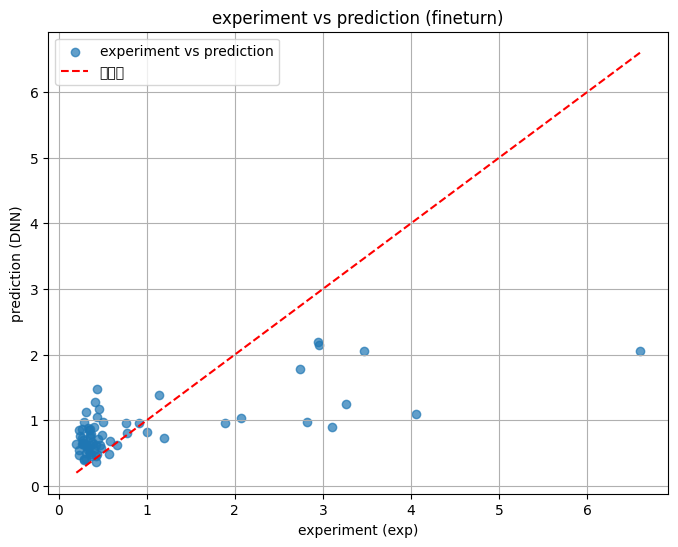

In [4]:
#####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# 读取CSV文件
file_path = '/content/iScore/Benchmark/Results/predictions_All_iScore_finetuned_test.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(file_path)

# 检查是否存在exp和XGB列
if 'exp' in df.columns and 'DNN' in df.columns:
    # 计算相关性
    pearson_corr, _ = pearsonr(df['exp'], df['DNN'])
    spearman_corr, _ = spearmanr(df['exp'], df['DNN'])

    # 计算均方误差 (MSE)
    mse = np.mean((df['exp'] - df['DNN'])**2)

    # 计算相对误差
    relative_error = np.abs(df['exp'] - df['DNN']) / df['exp']

    print(f"皮尔逊相关系数: {pearson_corr:.4f}")
    print(f"斯皮尔曼相关系数: {spearman_corr:.4f}")
    print(f"均方误差 (MSE): {mse:.4f}")
    print(f"平均相对误差: {relative_error.mean():.4f}")

    # 绘制散点图
    plt.figure(figsize=(8, 6))
    plt.scatter(df['exp'], df['DNN'], alpha=0.7, label='experiment vs prediction')
    plt.plot([df['exp'].min(), df['exp'].max()], [df['exp'].min(), df['exp'].max()], color='red', linestyle='--', label='理想线')
    plt.xlabel('experiment (exp)')
    plt.ylabel('prediction (DNN)')
    plt.title('experiment vs prediction (fineturn)')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("CSV文件中没有找到'exp'或'DNN'列！")